# Plot domains

This notebooks generates a plot of the WRF domains. It does so by loading a
sample output file for each domain, and getting the extents and projection info.


In [1]:
# Code adapted from https://wolfscie.wordpress.com/2017/10/05/visualizing-wrf-domain/

import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import wrf

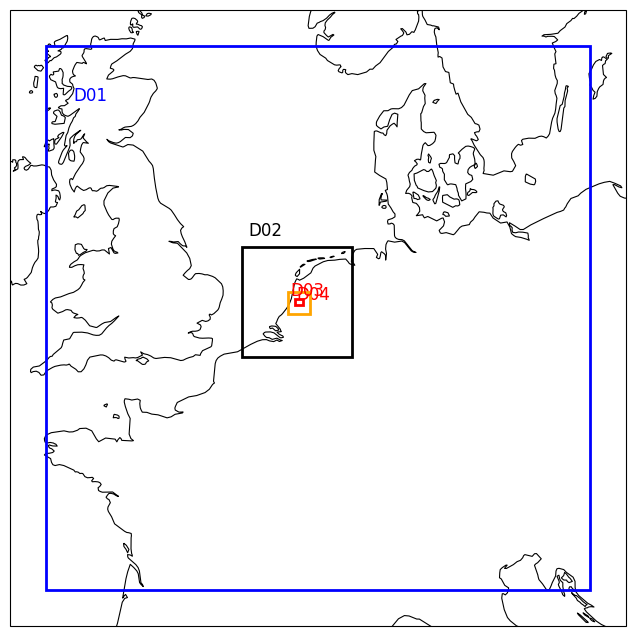

In [14]:
colors = ["blue", "black", "orange", "red"]
domains = ["d01", "d02", "d03", "d04"]

fig = plt.figure(figsize=(10, 8))


for domain, color in zip(domains, colors):
    infile = f"./wur_lcz/wrfout_{domain}_2019-07-23_06:00:00"

    with nc.Dataset(infile, "r") as input_file:
        # Load a random variable to extract some information
        rainnc = wrf.getvar(input_file, "RAINNC")
        cart_proj = wrf.get_cartopy(rainnc)
        [x0, x1] = wrf.cartopy_xlim(rainnc)
        [y0, y1] = wrf.cartopy_ylim(rainnc)

    width = x1 - x0
    height = y1 - y0

    if domain == "d01":
        ax = plt.axes(projection=cart_proj)
        ax.set_xlim([x0 - width / 15, x1 + height / 15])
        ax.set_ylim([y0 - height / 15, y1 + height / 15])

    ax.add_patch(
        mpl.patches.Rectangle(
            (x0, y0),
            width,
            height,
            fill=None,
            lw=2,
            edgecolor=color,
            zorder=10,
        )
    )
    ax.text(
        x0 + width * 0.05,
        y0 + height * 0.9,
        domain,
        size=12,
        color=color,
        zorder=10,
    )


ax.coastlines("50m", linewidth=0.8)
ax.stock_img()
plt.show()